In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
tr_A = "Train Accuracy"
te_A = "Test Accuracy"
tr_L = "Train Loss"
te_L = "Test Loss"
Train_Time ="Train Time"
Test_Time  = "Test Time"

n = 100


In [3]:
CIFAR10_ResNet50      = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/0-ResNet/History/CIFAR10-ResNet-new.json")
CIFAR10_Layer         = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/1-EnsembleLearning/History/CIFAR10-Layer-new.json")
CIFAR10_Neroun        =pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/1-EnsembleLearning/History/CIFAR10-Neuron-new.json")
CIFAR10_OutPut        =pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/1-EnsembleLearning/History/CIFAR10-Output-new.json")
CIFAR10_Layer_Loss    = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/2-ELwithLoss/History/CIFAR10-Layer-Loss-new.json")
CIFAR10_Neroun_loss   = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/2-ELwithLoss/History/CIFAR10-Neuron-Loss-new.json")

CIFAR100_ResNet50     = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/0-ResNet/History/CIFAR100-ResNet-new.json")
CIFAR100_OutPut        =pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/1-EnsembleLearning/History/CIFAR100-Output-new.json")
CIFAR100_Layer        = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/1-EnsembleLearning/History/CIFAR100-Layer-new.json")
CIFAR100_Neuron       = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/1-EnsembleLearning/History/CIFAR100-Neuron-new.json")
CIFAR100_Layer_Loss   = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/2-ELwithLoss/History/CIFAR100-Layer-Loss-new.json")
CIFAR100_Neuron_Loss  = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/2-ELwithLoss/History/CIFAR100-Neuron-Loss-new.json")

FASHION_MNIST_ResNet50= pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/0-ResNet/History/FASION_MNIST-ResNet-new.json")
FASHION_MNIST_OutPut  = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/1-EnsembleLearning/History/FASION_MNIST-Output-new.json")
FASHION_MNIST_Layer   = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/1-EnsembleLearning/History/FASION_MNIST-Layer-new.json")
FASHION_MNIST_Neuron  = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/1-EnsembleLearning/History/FASION_MNIST-Neuron-new.json")
FASHION_MNIST_Layer_Loss = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/2-ELwithLoss/History/FASION_MNIST-Layer-Loss-new.json")
FASHION_MNIST_Neuron_Loss= pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/2-ELwithLoss/History/FASION_MNIST-Neuron-Loss-new.json")

MNIST_ResNet50        = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/0-ResNet/History/MNIST-ResNet-new.json")
MNIST_OutPut          = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/1-EnsembleLearning/History/MNIST-Output-new.json")
MNIST_Layer           = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/1-EnsembleLearning/History/MNIST-Layer-new.json")
MNIST_Neuron          = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/1-EnsembleLearning/History/MNIST-Neuron-new.json")
MNIST_Layer_Loss           = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/2-ELwithLoss/History/MNIST-Layer-Loss-new.json")
MNIST_Neuron_Loss          = pd.read_json("/content/drive/MyDrive/ensemble-learning-using-resnet/2-ELwithLoss/History/MNIST-Neuron-Loss-new.json")

All_Result_List = [("CIFAR10_ResNet50", CIFAR10_ResNet50, "cifar10"), ("CIFAR10_Layer", CIFAR10_Layer, "cifar10"), ("CIFAR10_Neroun", CIFAR10_Neroun, "cifar10"), ("CIFAR10_OutPut", CIFAR10_OutPut, "cifar10"),
                   ("CIFAR10_Layer_Loss", CIFAR10_Layer_Loss, "cifar10"), ("CIFAR10_Neroun_loss", CIFAR10_Neroun_loss, "cifar10"),
                   ("CIFAR100_ResNet50", CIFAR100_ResNet50, "cifar100"), ("CIFAR100_OutPut", CIFAR100_OutPut, "cifar100"), ("CIFAR100_Layer", CIFAR100_Layer, "cifar100"), ("CIFAR100_Neuron", CIFAR100_Neuron, "cifar100"), ("CIFAR100_Layer_Loss", CIFAR100_Layer_Loss, "cifar100"),
                   ("CIFAR100_Neuron_Loss", CIFAR100_Neuron_Loss, "cifar100"),("FASHION_MNIST_ResNet50", FASHION_MNIST_ResNet50, "Fashin_Mnist"), ("FASHION_MNIST_OutPut", FASHION_MNIST_OutPut, "Fashin_Mnist"), ("FASHION_MNIST_Layer", FASHION_MNIST_Layer, "Fashin_Mnist"), ("FASHION_MNIST_Neuron", FASHION_MNIST_Neuron, "Fashin_Mnist"),
                   ("FASHION_MNIST_Layer_Loss", FASHION_MNIST_Layer_Loss, "Fashin_Mnist"), ("FASHION_MNIST_Neuron_Loss", FASHION_MNIST_Neuron_Loss, "Fashin_Mnist"),
                   ("MNIST_ResNet50", MNIST_ResNet50, "MNIST"), ("MNIST_OutPut", MNIST_OutPut, "MNIST"), ("MNIST_Layer", MNIST_Layer, "MNIST"), ("MNIST_Neuron", MNIST_Neuron, "MNIST"),("MNIST_Layer_Loss", MNIST_Layer_Loss, "MNIST"), ("MNIST_Neuron_Loss", MNIST_Neuron_Loss, "MNIST")]






In [20]:
for name, result, data_set in All_Result_List:
    print(name)
    print(f"Best {te_A}: {result[te_A].max():.2f}")
    print(f"Test Loss: {result[te_L][result[te_A].idxmax()]:.6f}")
    print("-----------------------------------------------------")

CIFAR10_ResNet50
Best Test Accuracy: 79.30
Test Loss: 0.006445
-----------------------------------------------------
CIFAR10_Layer
Best Test Accuracy: 85.84
Test Loss: 0.003520
-----------------------------------------------------
CIFAR10_Neroun
Best Test Accuracy: 85.58
Test Loss: 0.003881
-----------------------------------------------------
CIFAR10_OutPut
Best Test Accuracy: 78.49
Test Loss: 0.006468
-----------------------------------------------------
CIFAR10_Layer_Loss
Best Test Accuracy: 86.35
Test Loss: 0.003442
-----------------------------------------------------
CIFAR10_Neroun_loss
Best Test Accuracy: 85.15
Test Loss: 0.003788
-----------------------------------------------------
CIFAR100_ResNet50
Best Test Accuracy: 48.10
Test Loss: 0.020449
-----------------------------------------------------
CIFAR100_OutPut
Best Test Accuracy: 51.67
Test Loss: 0.016830
-----------------------------------------------------
CIFAR100_Layer
Best Test Accuracy: 50.01
Test Loss: 0.019524
-----

In [23]:
print(" Model\t\t\t\ttest acc")
print("----CIFAR10--------------------------------")
print("ResNet50\t\t\t", CIFAR10_ResNet50[te_A][:n].max())
print("OutPut Ensemble\t\t\t", CIFAR10_OutPut[te_A][:n].max())
print("Layer\t\t\t\t", CIFAR10_Layer[te_A][:n].max())
print("Neroun\t\t\t\t", CIFAR10_Neroun[te_A][:n].max())
print("Layer_Loss\t\t\t", CIFAR10_Layer_Loss[te_A][:n].max())
print("Neroun_loss\t\t\t", CIFAR10_Neroun_loss[te_A][:n].max())
print("-------------------------------------------")


print("----CIFAR100-------------------------------")
print("ResNet50\t\t\t", CIFAR100_ResNet50[te_A][:n].max())
print("OutPut Ensemble\t\t\t", CIFAR100_OutPut[te_A][:n].max())
print("Layer\t\t\t\t",CIFAR100_Layer[te_A][:n].max())
print("Neroun\t\t\t\t",CIFAR100_Neuron[te_A][:n].max())
print("Layer_Loss\t\t\t",CIFAR100_Layer_Loss[te_A][:n].max())
print("Neuron_Loss\t\t\t", CIFAR100_Neuron_Loss[te_A][:n].max())
print("-------------------------------------------")


print("---FASHION_MNIST---------------------------")
print("ResNet50\t\t\t", FASHION_MNIST_ResNet50[te_A][:n].max())
print("OutPut Ensemble\t\t\t", FASHION_MNIST_OutPut[te_A][:n].max())
print("Layer\t\t\t\t", FASHION_MNIST_Layer[te_A][:n].max())
print("Neroun\t\t\t\t", FASHION_MNIST_Neuron[te_A][:n].max())
print("Layer_Loss\t\t\t", FASHION_MNIST_Layer_Loss[te_A][:n].max())
print("Neuron_Loss\t\t\t", FASHION_MNIST_Neuron_Loss[te_A][:n].max())
print("-------------------------------------------")

print("----MNIST----------------------------------")
print("ResNet50\t\t\t",MNIST_ResNet50[te_A][:n].max())
print("OutPut Ensemble\t\t\t", MNIST_OutPut[te_A][:n].max())
print("Layer\t\t\t\t", MNIST_Layer[te_A][:n].max())
print("Neroun\t\t\t\t", MNIST_Neuron[te_A][:n].max())
print("Layer_Loss\t\t\t" , MNIST_Layer_Loss[te_A][:n].max())
print("Neuron_Loss\t\t\t" , MNIST_Neuron_Loss[te_A][:n].max())
print("-------------------------------------------")


 Model				test acc
----CIFAR10--------------------------------
ResNet50			 78.01
OutPut Ensemble			 78.49
Layer				 84.47
Neroun				 85.01
Layer_Loss			 84.93
Neroun_loss			 82.57
-------------------------------------------
----CIFAR100-------------------------------
ResNet50			 47.49
OutPut Ensemble			 51.67
Layer				 49.74
Neroun				 45.88
Layer_Loss			 54.45
Neuron_Loss			 46.76
-------------------------------------------
---FASHION_MNIST---------------------------
ResNet50			 88.85
OutPut Ensemble			 88.42
Layer				 89.3
Neroun				 88.65
Layer_Loss			 89.21
Neuron_Loss			 88.77
-------------------------------------------
----MNIST----------------------------------
ResNet50			 99.2
OutPut Ensemble			 99.32
Layer				 99.26
Neroun				 99.22
Layer_Loss			 99.33
Neuron_Loss			 99.18
-------------------------------------------


In [31]:

for name, result, data_set in All_Result_List:
    print(name)
    print(f"Avg Train Time: {result[Train_Time].mean():.3f}")
    print("-----------------------------------------------------")


CIFAR10_ResNet50
Avg Train Time: 13.797
-----------------------------------------------------
CIFAR10_Layer
Avg Train Time: 21.518
-----------------------------------------------------
CIFAR10_Neroun
Avg Train Time: 69.569
-----------------------------------------------------
CIFAR10_OutPut
Avg Train Time: 20.844
-----------------------------------------------------
CIFAR10_Layer_Loss
Avg Train Time: 21.462
-----------------------------------------------------
CIFAR10_Neroun_loss
Avg Train Time: 26.209
-----------------------------------------------------
CIFAR100_ResNet50
Avg Train Time: 12.722
-----------------------------------------------------
CIFAR100_OutPut
Avg Train Time: 20.830
-----------------------------------------------------
CIFAR100_Layer
Avg Train Time: 21.569
-----------------------------------------------------
CIFAR100_Neuron
Avg Train Time: 31.375
-----------------------------------------------------
CIFAR100_Layer_Loss
Avg Train Time: 21.362
----------------------

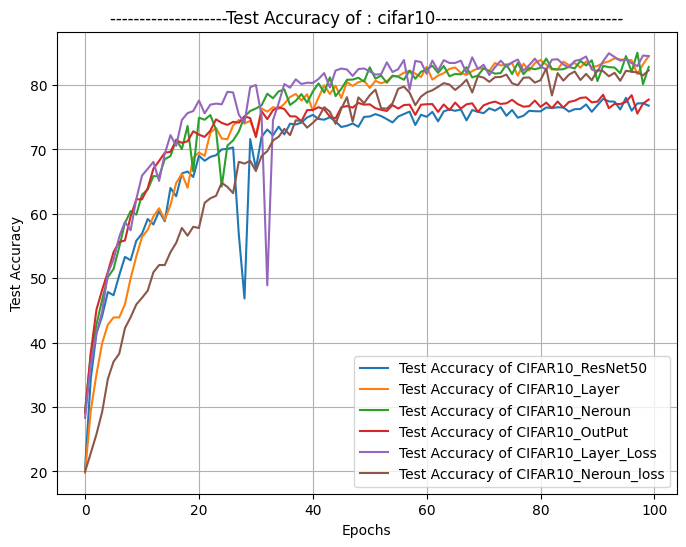

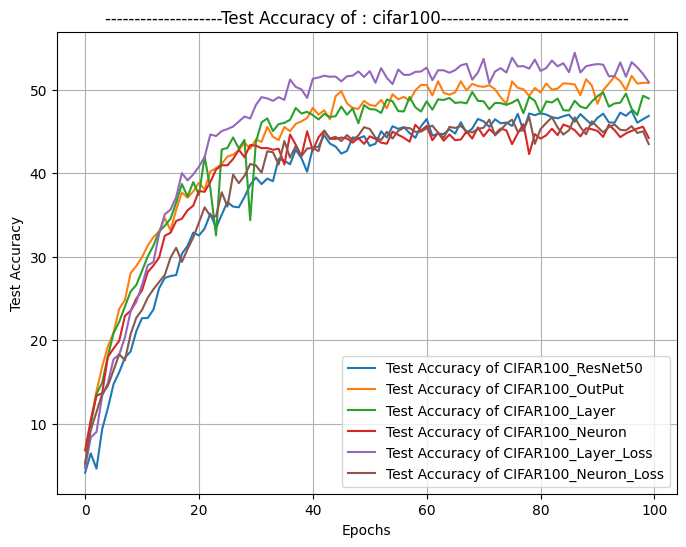

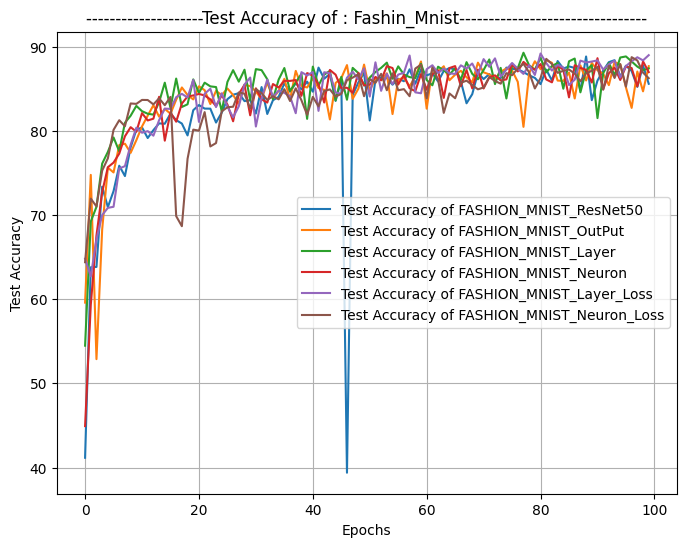

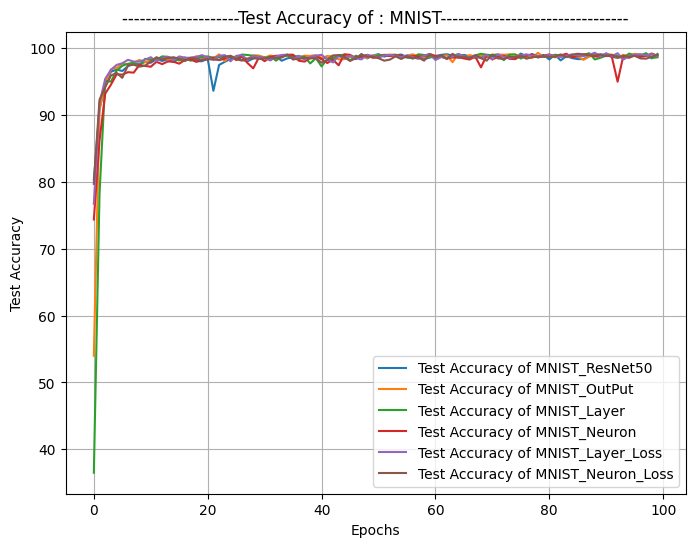

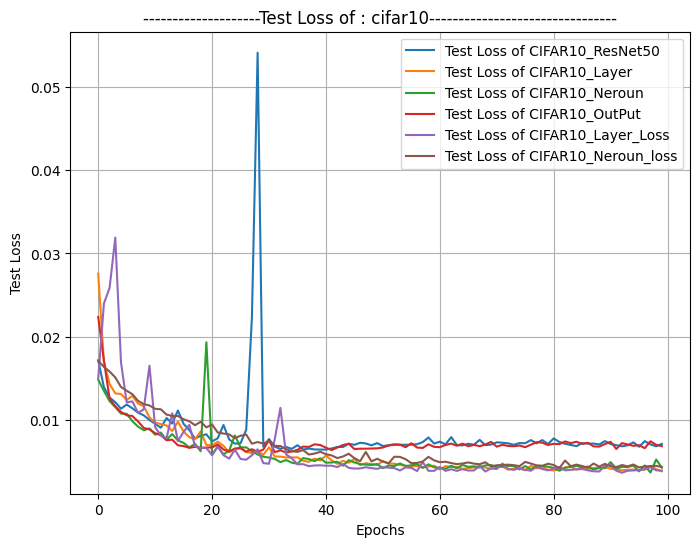

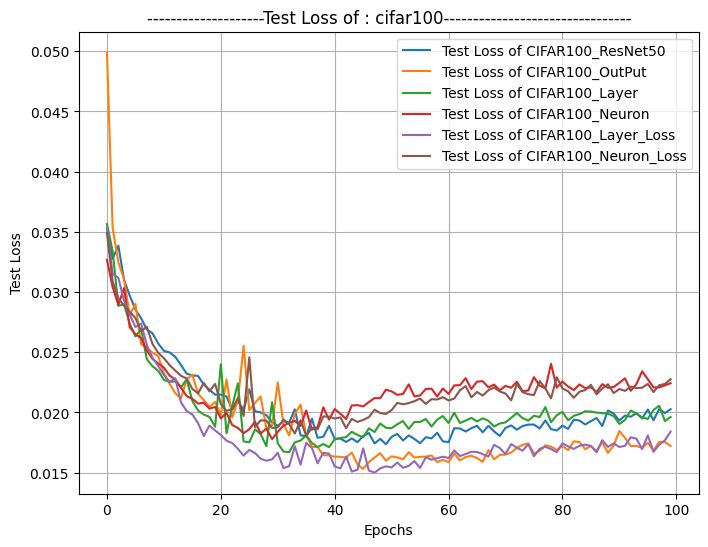

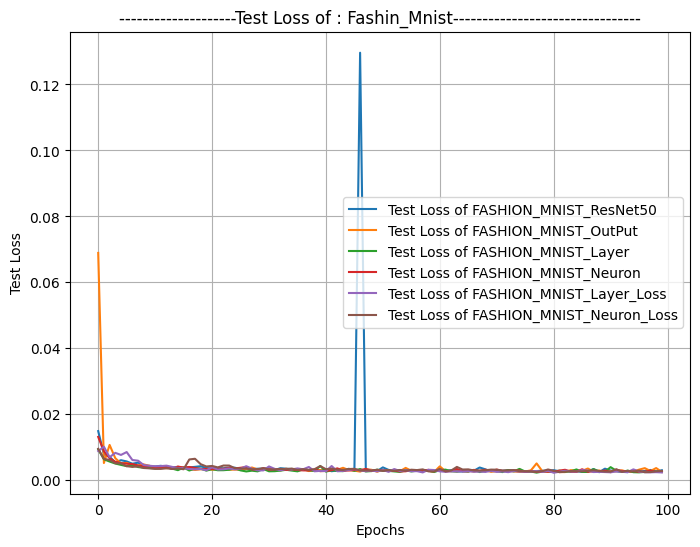

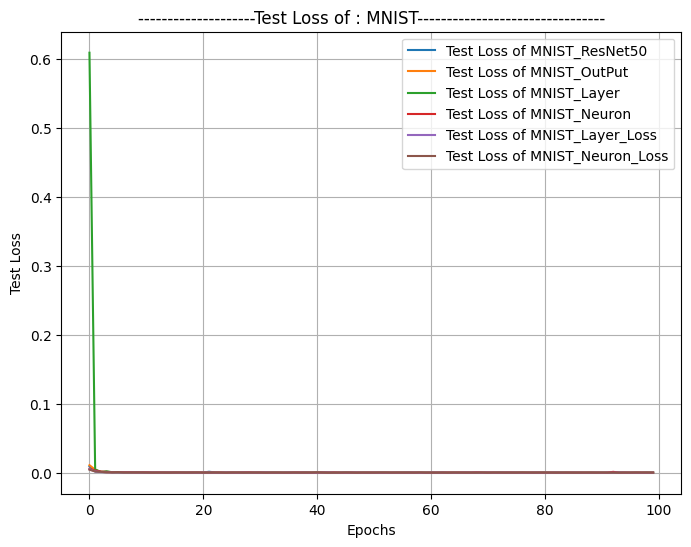

In [26]:
# Iterate through All_Result_List, grouping values by name
grouped_values = {}
for key, value, name in All_Result_List:
    if name not in grouped_values:
        grouped_values[name] = []
    grouped_values[name].append((key, value))

# Plot Train Accuracy for each name
# for name, values in grouped_values.items():
#     plt.figure(figsize=(8, 6))  # Adjust figure size as needed
#     plt.title(f"--------------------Train Accuracy of : {name}--------------------------------")

#     for key, value in values:
#         plt.plot(value[tr_A][:n], label=f"Train Accuracy of {key}")

#     plt.legend()
#     plt.xlabel("Epochs" or "Iterations")  # Specify the x-axis label
#     plt.ylabel("Train Accuracy")
#     plt.grid(True)  # Add grid for better readability
#     plt.show()


# Plot Train Loss for each name
# for name, values in grouped_values.items():
#     plt.figure(figsize=(8, 6))  # Adjust figure size as needed
#     plt.title(f"--------------------Train Loss of : {name}--------------------------------")

#     for key, value in values:
#         plt.plot(value[tr_L][:n], label=f"Train Loss of {key}")

#     plt.legend()
#     plt.xlabel("Epochs" or "Iterations")  # Specify the x-axis label
#     plt.ylabel("Train Loss")
#     plt.grid(True)  # Add grid for better readability
#     plt.show()



# Plot Test Accuracy for each name
for name, values in grouped_values.items():
    plt.figure(figsize=(8, 6))
    plt.title(f"--------------------Test Accuracy of : {name}--------------------------------")

    for key, value in values:
        plt.plot(value[te_A][:n], label=f"Test Accuracy of {key}")

    plt.legend()
    plt.xlabel("Epochs" or "Iterations")  # Specify the x-axis label
    plt.ylabel("Test Accuracy")
    plt.grid(True)
    plt.show()


# Plot Test Loss for each name
for name, values in grouped_values.items():
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.title(f"--------------------Test Loss of : {name}--------------------------------")

    for key, value in values:
        plt.plot(value[te_L][:n], label=f"Test Loss of {key}")

    plt.legend()
    plt.xlabel("Epochs" or "Iterations")  # Specify the x-axis label
    plt.ylabel("Test Loss")
    plt.grid(True)
    plt.show()
